<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Working%20with%20images/Convolution_102_Translational_invariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the image

In [ ]:
# author https://unsplash.com/@aahubs
url = "https://images.unsplash.com/photo-1618863099278-75222d755814?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"

file = tf.keras.utils.get_file('car',origin=url)

73728/59819 [====================================] - 0s 0us/step


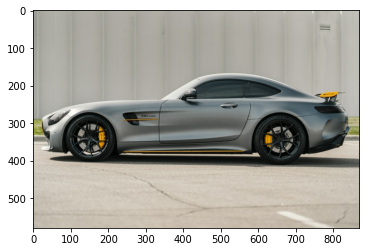

In [ ]:
# read the image
raw = tf.io.read_file(file)
# decode
img = tf.image.decode_jpeg(raw, channels=3) 
# display the image
plt.imshow(img);

## Convolution kernels

Find more at https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
# PREDEFINED KERNELS #

# Edge detection
edge = tf.constant(
    [[-1, -1, -1],
     [-1, 8, -1],
     [-1, -1, -1]],
)

# Blur
blur = tf.constant(
    [[0.0625, 0.125, 0.0625],
     [0.125, 0.25, 0.125],
     [0.0625, 0.125, 0.0625]],
)

# Bottom sobel
bottom_sobel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)

# Emboss South-East
emboss = tf.constant(
    [[-2, -1, 0],
     [-1, 1, 1],
     [0, 1, 2]],
)

# Sharpen
sharpen = tf.constant(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]],
)

## Feature extraction 

In [ ]:
# conver to float
input_img = tf.image.convert_image_dtype(img, dtype=tf.float32)
# add batch dimension
input_img = tf.expand_dims(input_img, axis=0)

In [ ]:
# Util for getting filter
def get_filter(kernel, is_color=True):
  if is_color:
    kernel = tf.stack([kernel]*3, axis=2)
    kernel = tf.reshape(kernel, shape=[*kernel.shape,1])
  else:
    kernel = tf.reshape(kernel, shape=[*kernel.shape,1,1])
  kernel = tf.cast(kernel, tf.float32)
  return kernel

### Convolution

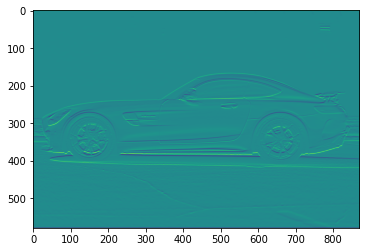

In [ ]:
extracted_features = tf.nn.conv2d(input_img, filters=get_filter(bottom_sobel), strides=1, padding='SAME')
# let's view the output of convolution
plt.imshow(tf.squeeze(extracted_features));

### Applying activation function

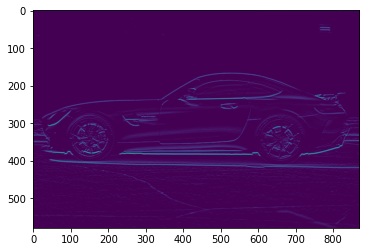

In [ ]:
# let's apply ReLU activation -- isloates the feature
feature_map = tf.nn.relu(extracted_features)
# let's view the feature map
plt.imshow(tf.squeeze(feature_map));

### Pooling layer

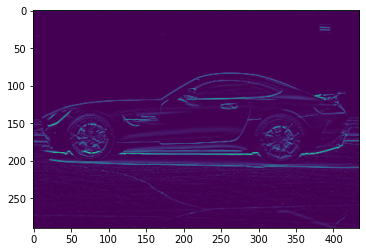

In [ ]:
# Use max pooling to summarize the feature map
summarize_feature_map = tf.nn.max_pool2d(feature_map, ksize=2, strides=2, padding='SAME' )
# visualize
plt.imshow(tf.squeeze(summarize_feature_map));

## Convolution Mathematics behind the scene example : 1

Lets define a simple array to act as an image, and another array to act as the kernel to see the mathematics behind the scenes

In [4]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
import numpy as np

sympy.init_printing()

In [ ]:
image = np.array([
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
])

# kernel that extract vertical lines in an image
vertical = np.array([
    [1, -1],
    [1, -1],
])

In [ ]:
# let's visualize the image - matrix
print('This matrix represent the image')
sympy.Matrix(image)

This matrix represent the image


⎡0  0  0  1  1  0  0  0⎤
⎢                      ⎥
⎢0  0  0  1  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  1  0  0  0⎥
⎢                      ⎥
⎣0  0  0  1  1  0  0  0⎦

In [ ]:
print('Our kernel that detect vertical lines')
sympy.Matrix(vertical)

Our kernel that detect vertical lines


⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [ ]:
# lets see convolution in action
image = tf.cast(image, tf.float32)
image = tf.reshape(image, shape=[1, *image.shape, 1]) #input must be 4-dimensional or more

In [ ]:
convolution = tf.nn.conv2d(image, filters=get_filter(vertical, is_color=False), strides=1, padding='SAME')

In [ ]:
print('The output of Convolution operation')
sympy.Matrix(tf.squeeze(convolution).numpy())

The output of Convolution operation


⎡0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎤
⎢                                       ⎥
⎢0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                       ⎥
⎢0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                       ⎥
⎢0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                       ⎥
⎢0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                       ⎥
⎢0.0  0.0  -2.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                       ⎥
⎣0.0  0.0  -1.0  0.0  1.0  0.0  0.0  0.0⎦

In [ ]:
print('Isolates the features by applying activation')
sympy.Matrix(tf.squeeze(tf.nn.relu(convolution)).numpy())

Isolates the features by applying activation


⎡0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎤
⎢                                      ⎥
⎢0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                      ⎥
⎢0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                      ⎥
⎢0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                      ⎥
⎢0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                      ⎥
⎢0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                      ⎥
⎣0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0⎦

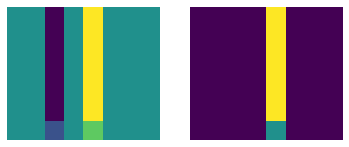

In [ ]:
plt.subplot(1,2,1)
plt.imshow(tf.squeeze(convolution))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tf.squeeze(tf.nn.relu(convolution)))
plt.axis('off')

plt.show()

## Convolution Mathematics behind the scene example : 2

Lets define a simple array to act as an image, and another array to act as the kernel to see the mathematics behind the scenes

In [ ]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
import numpy as np

sympy.init_printing()

In [ ]:
image = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
])


# kernel that extract vertical lines in an image
vertical = np.array([
    [1, -1],
    [1, -1],
])

# kernel that extract horizontal lines in an image
horizontal = np.array([
    [ 1,  1],
    [-1, -1],
])

In [ ]:
# let's visualize the image - matrix
print('This matrix represent the image')
sympy.Matrix(image)

This matrix represent the image


⎡0  0  0  1  0  0  0⎤
⎢                   ⎥
⎢0  0  0  1  0  0  0⎥
⎢                   ⎥
⎢0  0  0  1  0  0  0⎥
⎢                   ⎥
⎢1  1  1  1  1  1  1⎥
⎢                   ⎥
⎢0  0  0  1  0  0  0⎥
⎢                   ⎥
⎢0  0  0  1  0  0  0⎥
⎢                   ⎥
⎣0  0  0  1  0  0  0⎦

In [ ]:
print('Our kernel that detect horizontal lines')
sympy.Matrix(horizontal)

Our kernel that detect horizontal lines


⎡1   1 ⎤
⎢      ⎥
⎣-1  -1⎦

In [ ]:
print('Our kernel that detect vertical lines')
sympy.Matrix(vertical)

Our kernel that detect vertical lines


⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [ ]:
# lets see convolution in action
image = tf.cast(image, tf.float32)
image = tf.reshape(image, shape=[1, *image.shape, 1]) #input must be 4-dimensional or more

In [ ]:
convolution = tf.nn.conv2d(image, filters=get_filter(vertical, is_color=False), strides=1, padding='SAME')

In [ ]:
print('The output of Convolution operation')
sympy.Matrix(tf.squeeze(convolution).numpy())

The output of Convolution operation


⎡0.0  0.0  -2.0  2.0  0.0  0.0  0.0⎤
⎢                                  ⎥
⎢0.0  0.0  -2.0  2.0  0.0  0.0  0.0⎥
⎢                                  ⎥
⎢0.0  0.0  -1.0  1.0  0.0  0.0  1.0⎥
⎢                                  ⎥
⎢0.0  0.0  -1.0  1.0  0.0  0.0  1.0⎥
⎢                                  ⎥
⎢0.0  0.0  -2.0  2.0  0.0  0.0  0.0⎥
⎢                                  ⎥
⎢0.0  0.0  -2.0  2.0  0.0  0.0  0.0⎥
⎢                                  ⎥
⎣0.0  0.0  -1.0  1.0  0.0  0.0  0.0⎦

In [ ]:
print('Isolates the features by applying activation')
sympy.Matrix(tf.squeeze(tf.nn.relu(convolution)).numpy())

Isolates the features by applying activation


⎡0.0  0.0  0.0  2.0  0.0  0.0  0.0⎤
⎢                                 ⎥
⎢0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  1.0  0.0  0.0  1.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  1.0  0.0  0.0  1.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  2.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎣0.0  0.0  0.0  1.0  0.0  0.0  0.0⎦

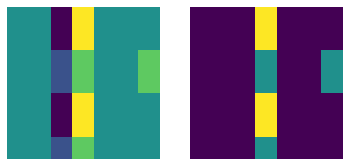

In [ ]:
plt.subplot(1,2,1)
plt.imshow(tf.squeeze(convolution))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tf.squeeze(tf.nn.relu(convolution)))
plt.axis('off')

plt.show()

In [ ]:
# lets see what happen when we apply a horizontal filter
convolution = tf.nn.conv2d(image, filters=get_filter(horizontal, is_color=False), strides=1, padding='SAME')

print('The output of Convolution operation')
sympy.Matrix(tf.squeeze(convolution).numpy())

The output of Convolution operation


⎡0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                        ⎥
⎢0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                        ⎥
⎢-2.0  -2.0  -1.0  -1.0  -2.0  -2.0  -1.0⎥
⎢                                        ⎥
⎢2.0   2.0   1.0   1.0   2.0   2.0   1.0 ⎥
⎢                                        ⎥
⎢0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                        ⎥
⎢0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                        ⎥
⎣0.0   0.0   1.0   1.0   0.0   0.0   0.0 ⎦

In [ ]:
print('Isolates the features by applying activation')
sympy.Matrix(tf.squeeze(tf.nn.relu(convolution)).numpy())

Isolates the features by applying activation


⎡0.0  0.0  0.0  0.0  0.0  0.0  0.0⎤
⎢                                 ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎢2.0  2.0  1.0  1.0  2.0  2.0  1.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎢0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                 ⎥
⎣0.0  0.0  1.0  1.0  0.0  0.0  0.0⎦

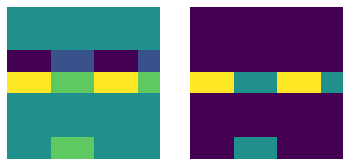

In [ ]:
plt.subplot(1,2,1)
plt.imshow(tf.squeeze(convolution))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tf.squeeze(tf.nn.relu(convolution)))
plt.axis('off')

plt.show()

## Summarizing feature map to retain the useful part

Notice that after applying the ReLU activation function the feature map ends up with a lot of black area; that is, areas containing only 0's (the black areas in the image).

These black areas of the feature map are not giving us much information about the patterns we are extacting expect the position/location of these patterns within the image.

What we would like to do is to summarize the feature map to retain only the most useful part -- the feature itself.
This is exactly what pooling layers do , they takes a window of feature map and replaces the activations within the window by a summary of activations.

For example : Max pooling <br>
What maximum pooling does is, it takes a window of feature map and replaces them with the maximum activation in that window. 

Similary : Average pooling <br>
The Average pooling computes the average of the activations present within a window.

Global pooling <br>
Instead of down sampling patches of the input feature map, global pooling down samples the entire feature map to a single value. This would be the same as setting the window size to the size of the input feature map.

In [10]:
# https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.circle_perimeter
from numpy.core.fromnumeric import shape
# lets draw some cirles
from skimage.draw import circle_perimeter 

circle = np.zeros(shape=(16,16))
#Generate circle perimeter coordinates.
rr, cc = circle_perimeter(8,8,4,shape=(16,16))

circle[rr,cc] = 1

print(circle)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Max pooling

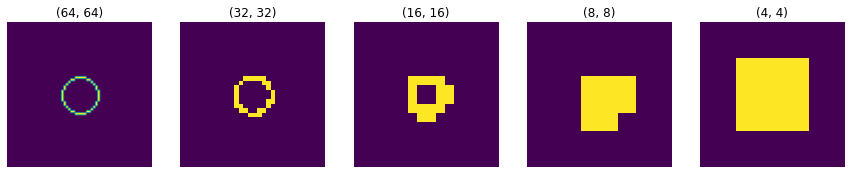

In [21]:
circle = np.zeros(shape=(64,64))
rr, cc = circle_perimeter(32,32,8,shape=(64,64))
circle[rr,cc] = 1

plt.figure(figsize=(15,15))
plt.subplot(1,5,1)
plt.imshow(circle)
plt.axis('off')
plt.title(circle.shape)

# reshape to add batch dimension and color channnel
circle_ = tf.reshape(circle, shape=(1,*circle.shape,1))

for i in range(4):
  plt.subplot(1,5,i+2)
  # max-pooling
  circle_ = tf.nn.max_pool2d(circle_,ksize=2,strides=2,padding='SAME')
  plt.imshow(tf.squeeze(circle_))
  plt.axis('off')
  plt.title(tf.squeeze(circle_).shape)

plt.show()

### Average pooling

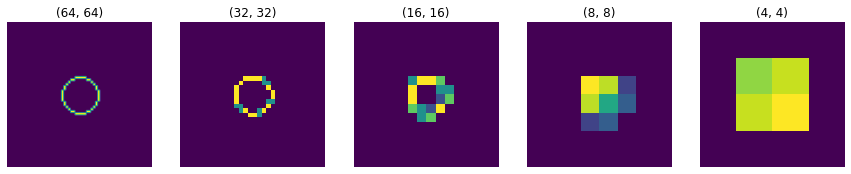

In [23]:
circle = np.zeros(shape=(64,64))
rr, cc = circle_perimeter(32,32,8,shape=(64,64))
circle[rr,cc] = 1

plt.figure(figsize=(15,15))
plt.subplot(1,5,1)
plt.imshow(circle)
plt.axis('off')
plt.title(circle.shape)

# reshape to add batch dimension and color channnel
circle_ = tf.reshape(circle, shape=(1,*circle.shape,1))

for i in range(4):
  plt.subplot(1,5,i+2)
  # average-pooling
  circle_ = tf.nn.avg_pool2d(circle_,ksize=2,strides=2,padding='SAME')
  plt.imshow(tf.squeeze(circle_))
  plt.axis('off')
  plt.title(tf.squeeze(circle_).shape)

plt.show()